In [45]:
import pandas as pd

# Step 2: Load the CSV file
df = pd.read_csv('/Users/zahranazemian/Desktop/Python/auto.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [46]:
import numpy as np
df.replace("?", np.nan, inplace = True)
print(df["horsepower"].isna().sum())

2


In [47]:
print(df["horsepower"].dtype) 

object


In [48]:
# Convert 'horsepower' to numeric, forcing non-numeric to NaN
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Fill NaN values with 0 (or any integer you prefer)
df["horsepower"] = df["horsepower"].fillna(0).astype(int)

# Check the result
print(df["horsepower"].dtype)  # Should now be 'int64'


int64


Text(0.5, 1.0, 'horsepower bins')

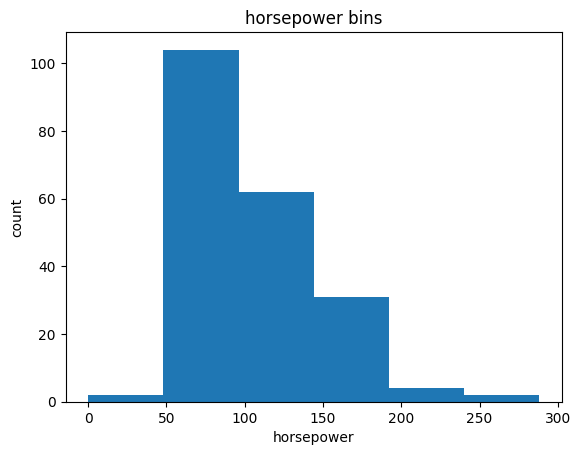

In [49]:
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 6)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

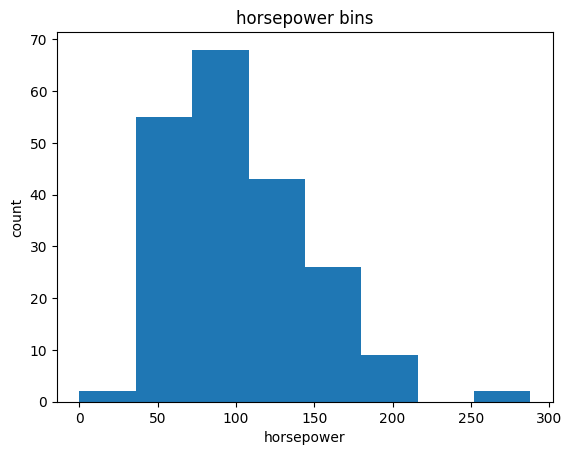

In [35]:
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 8)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [50]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [51]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [52]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [53]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495,False,True
1,3,NaN,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,False,True
2,1,NaN,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,False,True
5,2,NaN,audi,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.5,110,5500,19,25,15250,False,True
6,1,158,audi,std,four,sedan,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110,5500,19,25,17710,False,True
7,1,NaN,audi,std,four,wagon,fwd,front,105.8,192.7,...,3.19,3.40,8.5,110,5500,19,25,18920,False,True
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,192.7,...,3.13,3.40,8.3,140,5500,17,20,23875,False,True
9,0,NaN,audi,turbo,two,hatchback,4wd,front,99.5,178.2,...,3.13,3.40,7.0,160,5500,16,22,NaN,False,True


In [55]:
print(df["aspiration"].unique())

['std' 'turbo']


In [57]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.head()

,std,turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [59]:
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [60]:
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)
df.head(10)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,NaN,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495,False,True,True,False
1,3,NaN,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500,False,True,True,False
2,1,NaN,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450,False,True,True,False
5,2,NaN,audi,two,sedan,fwd,front,99.8,177.3,66.3,...,8.5,110,5500,19,25,15250,False,True,True,False
6,1,158,audi,four,sedan,fwd,front,105.8,192.7,71.4,...,8.5,110,5500,19,25,17710,False,True,True,False
7,1,NaN,audi,four,wagon,fwd,front,105.8,192.7,71.4,...,8.5,110,5500,19,25,18920,False,True,True,False
8,1,158,audi,four,sedan,fwd,front,105.8,192.7,71.4,...,8.3,140,5500,17,20,23875,False,True,False,True
9,0,NaN,audi,two,hatchback,4wd,front,99.5,178.2,67.9,...,7.0,160,5500,16,22,NaN,False,True,False,True


In [61]:
df.to_csv('clean_df.csv')

In [62]:
import os
print(os.getcwd())

/Users/zahranazemian
